In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
np.random.seed(421)


data_set = np.loadtxt("hw04_data_set.csv", delimiter = ",", skiprows = 1)

x_train = data_set[:150,0]
y_train = data_set[:150,1]
x_test = data_set[150:,0]
y_test = data_set[150:,1]

N = data_set.shape[0]
print(x_train.shape)

print(x_test.shape)
print(y_test.shape)
print(y_train.shape)


(150,)
(122,)
(122,)
(150,)


<ipython-input-3-489836ba33a2>:16: RuntimeWarning: invalid value encountered in double_scalars
  p_hat.append((sum(((left_borders[x] < x_train) & (x_train <= right_borders[x]))*y_train)/(sum((left_borders[x] < x_train) &(x_train <= right_borders[x])))))


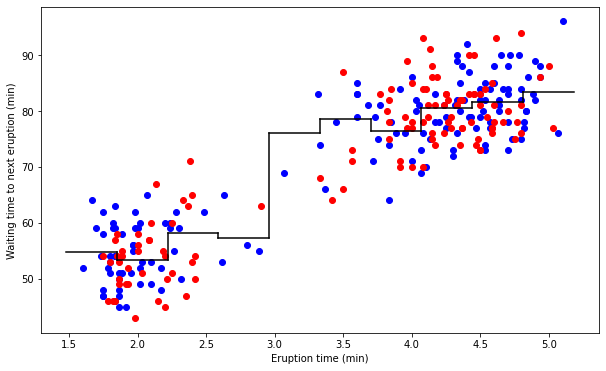

In [3]:
bin_width =0.37
origin=1.5

point_colors = np.array(["red", "blue"])
minimum_value = 0
maximum_value = 60
data_interval = np.arange(minimum_value,maximum_value,step = 0.01)

left_borders = np.arange(minimum_value,maximum_value-bin_width,step = bin_width)
right_borders = np.arange(minimum_value + bin_width,maximum_value,step = bin_width)


p_hat = []

for x in range (len(left_borders)):
    p_hat.append((sum(((left_borders[x] < x_train) & (x_train <= right_borders[x]))*y_train)/(sum((left_borders[x] < x_train) &(x_train <= right_borders[x])))))

    
p_hat=np.array(p_hat)
plt.figure(figsize = (10, 6))
plt.plot(x_train,y_train,'bo')
plt.plot(x_test,y_test,'ro')
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-")    
plt.show()

In [4]:
#RMSE
rmse = 0
for i in range(0,len(x_test)):
    for b in range(0,len(left_borders)):
        if(left_borders[b] < x_test[i] and x_test[i] <= right_borders[b]):
             rmse =  rmse + (y_test[i] - p_hat[int((x_test[i])/bin_width)])**2
RMSE = np.sqrt(rmse / len(x_test))
print("Regressogram => RMSE is", RMSE," when h is 0.37")

Regressogram => RMSE is 5.976284549161373  when h is 0.37


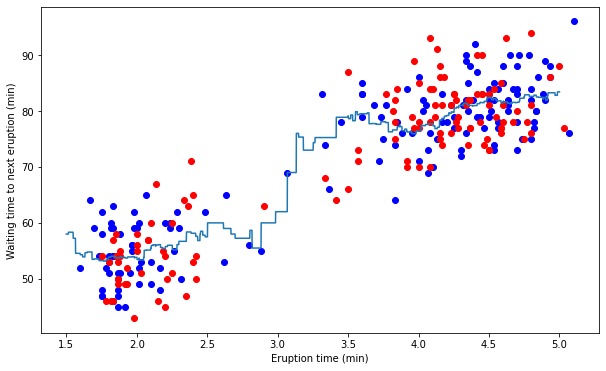

In [5]:
p_hat_rms = []
data_interval = np.arange(1.5,5, step = 0.0005833)
for x in range (0,len(data_interval)):
    k=sum((((data_interval[x]-0.5*bin_width)<x_train)&(x_train <= (data_interval[x] + 0.5 * bin_width)))*y_train)
    m=sum((((data_interval[x]-0.5*bin_width)<x_train)&(x_train <= (data_interval[x] + 0.5 * bin_width))))
    c = np.divide(k, m, out=np.zeros_like(k), where=m!=0)
    p_hat_rms.append(c)
p_hat_rms=np.array(p_hat_rms)

plt.figure(figsize = (10, 6))
plt.plot(x_train,y_train,'bo')
plt.plot(x_test,y_test,'ro')
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.plot(data_interval,p_hat_rms)

In [10]:

rmse = 0
for i in range(0,len(x_test)):
    for b in range(0,len(left_borders)):
        if(left_borders[b] < x_test[i] and x_test[i] <= right_borders[b]):
             rmse =  rmse + (y_test[i] - p_hat_rms[int((x_test[i])/0.001)])**2
RMSE = np.sqrt(rmse / len(x_test))
print("Regressogram => RMSE is", RMSE," when h is 0.37")



Regressogram => RMSE is 7.172506988423565  when h is 0.37


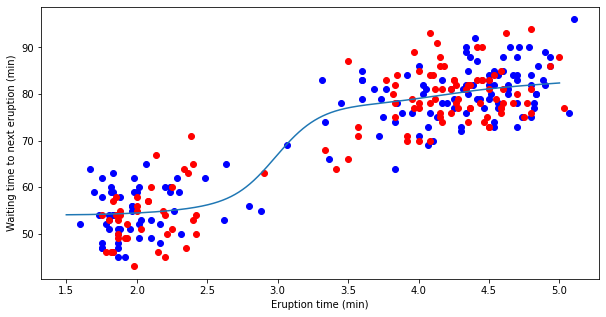

In [14]:
a=[]
b=[]
bin_width=0.37
p_hat_kernel = []

data_interval = np.arange(1.5,5, step = 0.0005833)

for x in range(0, len(data_interval)):
    a= sum(((1 / math.sqrt(2 * math.pi)) * (np.exp(-0.5 * ((x_train-data_interval[x])**2) / bin_width**2))*y_train)) 
    b= sum((1 / math.sqrt(2 * math.pi)) * np.exp(-0.5 * ((x_train-data_interval[x])**2) / bin_width**2))
    p_hat_kernel.append(a/b)
    
plt.figure(figsize = (10, 5))
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.plot(x_train,y_train,'bo')
plt.plot(x_test,y_test,'ro')
plt.plot(data_interval,p_hat_kernel)

In [11]:


rmse = 0
for i in range(0,len(x_test)):
    for b in range(0,len(left_borders)):
        if(left_borders[b] < x_test[i] and x_test[i] <= right_borders[b]):
             rmse =  rmse + (y_test[i] - p_hat_kernel[int((x_test[i])/0.001)])**2
RMSE = np.sqrt(rmse / len(x_test))
print("Regressogram => RMSE is", RMSE," when h is 0.37")



Regressogram => RMSE is 6.625931605480424  when h is 0.37
